In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

<h1 style="font-size: 30px"> First assigment </h1>
<hr>

<p style="font-size: 15; text-align: justify">
This first assigment of the Physical Models of Complex Systems course is divided into 2 main parts:
 </p>
 
- <p style="font-size: 15; text-align: justify">Solve the Quasi Stationary Approximation of the Consumer Resource Model with 1 species and 1 abiotic resource and compare it numerically with the full equation.

- Write the Fokker Plank Equation associated to the stochastic logistic equation with environmental noise and solve the stationary solution $P^*$

<h2 style="font-size: 25px;">Consumer Resource Model with 1 species and 1 abiotic resource</h2>

<p style="text-align: justify; font-size: 15px">
Let's begin by writing down the equation of the model. In this setting we take into consideration the resource not being unlimited and we take into account its variation in time.
</p>

<p style="text-align: justify; font-size: 15px">
Contrary to the biotic case where the resource is considered a species of its own, in the a-biotic case we are in the setting in which the resource is behaving like a chemical.<br>

Furthermore the growth rate takes the shape of the <i style="font-style: oblique 15deg">Monod function</i>. <br>
The two differential equations that describing the resource over time $R(t)$ and the population over time $N(t)$, are written below.
</p>

$$
\begin{equation}
   
    \begin{cases}
      \dfrac{\it{d} R}{\it{dt}} \quad =& -cN_tR + \dfrac{R}{k_s + R}\\ 
      \\
      \dfrac{\it{d} N}{\it{dt}} \quad =& \big(\gamma c R - d  \big) N_t \\
      
    \end{cases}       
\end{equation}
$$

Where:

- $\mu(R) = \dfrac{R}{k_s + R}$ is The Monod Equation

- c is an efficiency constant related to the fraction of the resource consumed

- $\gamma$ is an efficiency constant related to how much the resource up-taken are used for growth

- d is the death rate

- $K_s$  is the saturation constant


<p style="text-align: justify; font-size: 15px">

In order to simplify the model we make the <b style="font-size: 15px">Quasi-static approximation</b>, that is, when the population changes the resource will quickly reach a new equilibrium before the resource can change again. This is summarized in the following relation
</p>


$$
\begin{equation} \tag{2}
\frac{ \it{d}R}{\it{dt}} = 0
\end{equation}
$$

And we call the solution to the stationary equation $R^*$

We have:

$$
\begin{equation}\tag{3}
0 = \dfrac{R}{k_s + R} - RcN_t \bigg\vert_{R = R^*}
\end{equation}
$$

that yelds

$$
\begin{equation}\tag{4}
R^* = \dfrac{1 - cN_tk_s}{cN_t}
\end{equation}
$$

Substitutuìing in the equation for the population

$$
\begin{equation}\tag{5}
\dfrac{\it{d}N_t}{\it{d}t} = N_t(\gamma c R^* - d) =\\
\\

= N_t\big( \dfrac{\gamma \cancel{c}}{\cancel{c} N_t}\big(1 - cN_tk_s\big) - d \big) =\\

= \gamma - \big(\gamma c k_s + d\big)N_t 
\end{equation}
$$

Solving and inserting the intial condition $N(0) = N_0$ we arrive at the solution

$$
\begin{equation}\tag{6}
N_t = \dfrac{\gamma}{\gamma c k_s + d} - \big( \dfrac{\gamma}{\gamma c k_s + d} - N_0 \big) e^{- t\cdot (\gamma c k_s + d  )}

\end{equation}
$$



## Visualizing the QSA

In [23]:
def population(gamma, c, ks, d, initial, t):
    b = gamma * c * ks + d
    """
    Computes the population of a species at time t given the initial population
    and the parameters gamma and b.
    """
    return gamma/b - (gamma/b - initial)*np.exp(-b*t)


In [24]:
def stationary_resource(ks, c, d, initial, gamma, t):
    """
    Computes the stationary resource at time t given the initial resource
    and the parameters ks, c, d, gamma.
    """
    population_t = population(gamma, c, ks, d, initial, t)

    return (1 - c*ks * population_t )/(c * population_t) 

With this choice of the parameter we obtain a value of gamma * c * ks = 0.1
Is it greater than 0? True Then the resource has an initial value greater than 0


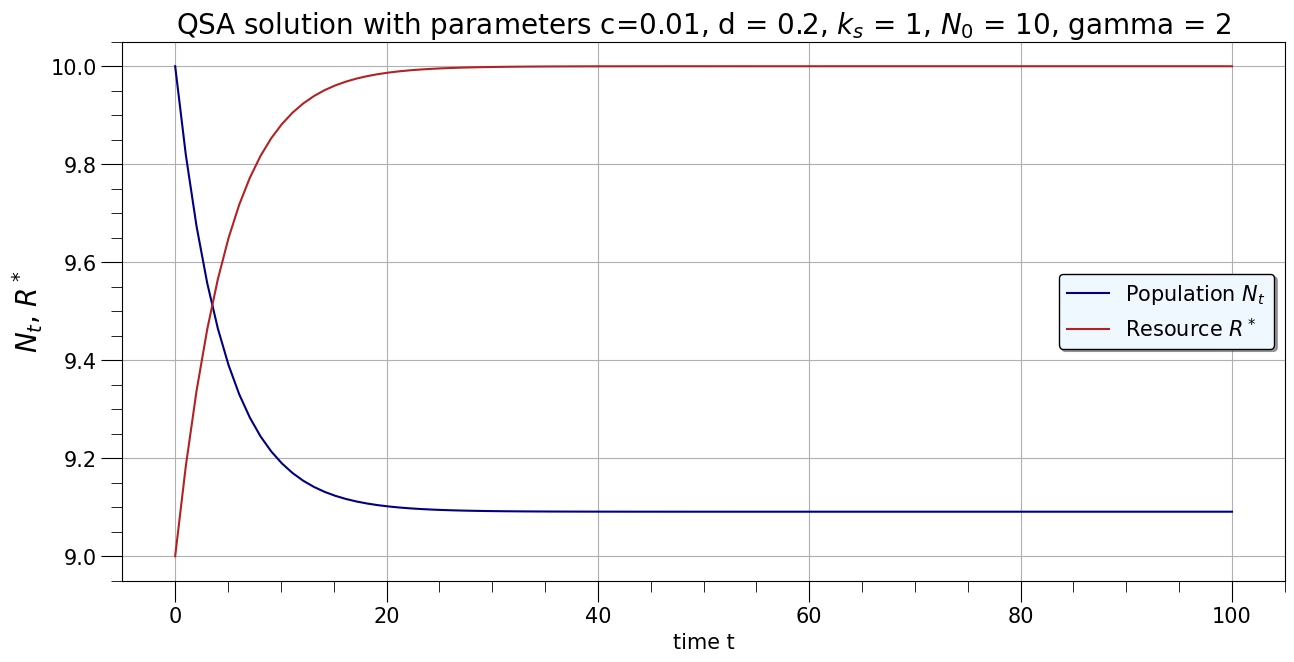

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))


c = 1/100; d = 1/5; ks = 1; initial = 10; gamma = 2

t = np.linspace(0, 100, 100)

population_t = population(gamma, c, ks, d, initial, t)
stationary_result = stationary_resource(ks, c, d, initial, gamma, t)


ax.plot(t, population_t, zorder = 2, label = "Population $N_t$", color = 'navy')
ax.plot(t, stationary_result, zorder = 2, label = "Resource $R^*$", color = 'firebrick')
ax.legend(fontsize = 15, facecolor = 'aliceblue', shadow = True, edgecolor = 'black')
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.set_xlabel('time t', fontsize = 15)
ax.set_ylabel('$N_t$, $R^*$', fontsize = 20)
ax.minorticks_on()
ax.set_title(f'QSA solution with parameters c={c}, d = {d}, $k_s$ = {ks}, $N_0$ = {initial}, gamma = {gamma}', fontsize = 20)

ax.grid(zorder = 1)
print('With this choice of the parameter we obtain a value of gamma * c * ks =', initial * ks * c)
print('Is it greater than 0?', initial * ks * c > 0, 'Then the resource has an initial value greater than 0')
plt.show()

## Numerical solution to the full differential equations

<p style="text-align: justify; font-size: 15px">
We put care here of choosing for R the same initial condition of the <b>QSA</b> case
</p>

In [26]:
c = 1/100; d = 1/5; ks = 1; initial_N = 10; gamma = 2

initial_R = (1 - c * initial_N * ks)/(c * initial_N) # In order to have the same initial conditions as in the previous case (QSA)

def system(y, t, c, d, ks, gamma):
    N, R = y

    # Resource
    dR_dt = - c * N * R + R/(ks + R) # Where ks is the the saturation constant, the concentrarion of resources is half of the maxiumum

    # Population
    dN_dt = (gamma * c * R - d) * N

    return [dN_dt, dR_dt]


# time_domain
t = np.linspace(0, 100, 100)

# initial conditions
y0 = [initial_N, initial_R]

solution = odeint(system, y0, t, args=(c, d, ks, gamma))

With this choice of the parameter we obtain a value of gamma * c * ks = 0.1
Is it greater than 0? True . Then the resource has an initial value greater than 0


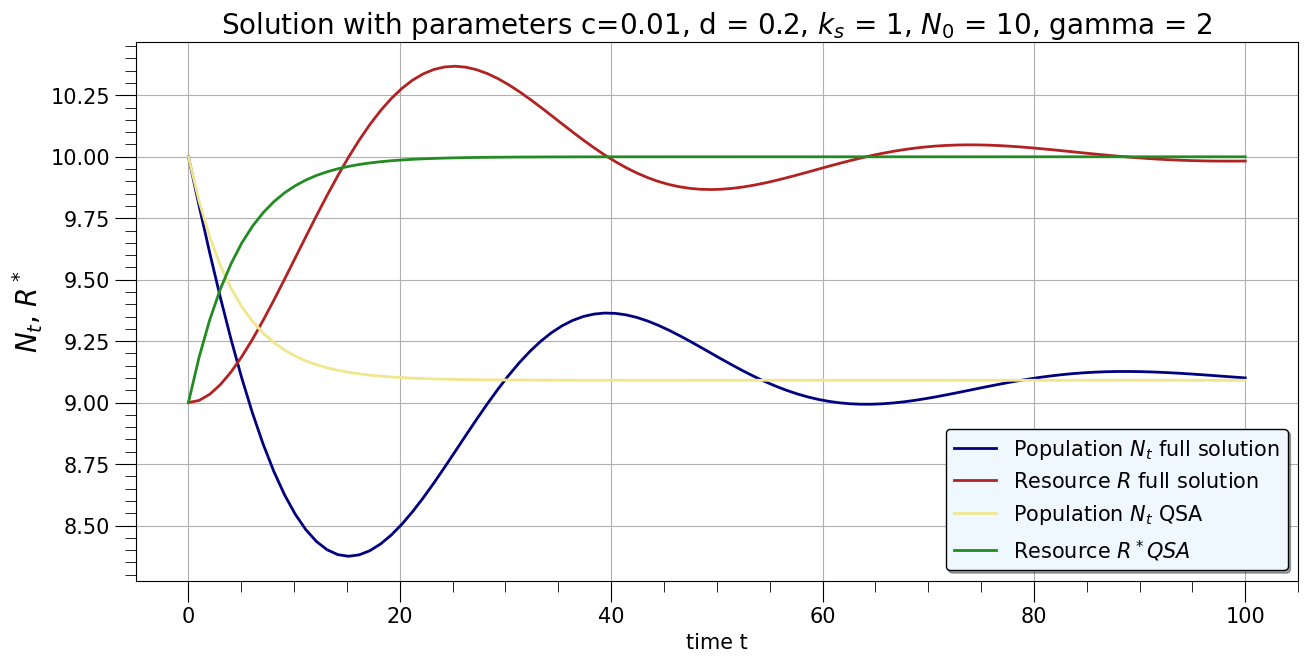

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))



ax.plot(t, solution[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
ax.plot(t, solution[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)
ax.plot(t, population_t, zorder = 2, label = "Population $N_t$ QSA", color = 'khaki', linewidth = 2)
ax.plot(t, stationary_result, zorder = 2, label = "Resource $R^* QSA$", color = 'forestgreen', linewidth = 2)
ax.legend(fontsize = 15, facecolor = 'aliceblue', shadow = True, edgecolor = 'black')
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.set_xlabel('time t', fontsize = 15)
ax.set_ylabel('$N_t$, $R^*$', fontsize = 20)
ax.minorticks_on()
ax.set_title(f'Solution with parameters c={c}, d = {d}, $k_s$ = {ks}, $N_0$ = {initial}, gamma = {gamma}', fontsize = 20)

ax.grid(zorder = 1)
print('With this choice of the parameter we obtain a value of gamma * c * ks =', initial * ks * c)
print('Is it greater than 0?', initial * ks * c > 0, '. Then the resource has an initial value greater than 0')
plt.show()

<h2 style="font-size: 25px;">Results</h2>

<p style="text-align: justify; font-size: 15px">
What we do in the following is to analyze the results summarized, for the first 100 time steps, in our plots for both cases.
</p>

<ul>
    <li style="text-align: justify; padding-bottom: 10px; font-size: 15px">
    <b style="font-size: 20px;">QSA</b>: We notice that, with this choice of the parameters, both the resource and the population reach fairly soon a stationary value after a transient time.
    </li>
    <li style="text-align: justify; font-size: 15px">
    <b style="font-size: 20px;">Full solution</b>: In the full solution's case the curves oscillate much more then in the <b>QSA</b> solution but, as we might expect, as <i>t</i> increases the two cases become closer and closer.
    </li>
</ul>

<h2 style="font-size: 25px;">Results</h2>

<p style="text-align: justify; font-size: 15px">
In the followinf, we test how the <b>QSA</b> and the full solution <b>full solution</b> vary as the parameters change.<br>
Although the criteria is limited we will test the changes modifying only one parameter at a time.
</p>

<p style="text-align: justify; font-size: 15px">
Each of them will be, in turn, increased and deacreased. In the following cells we will the analyze the results.
</p>



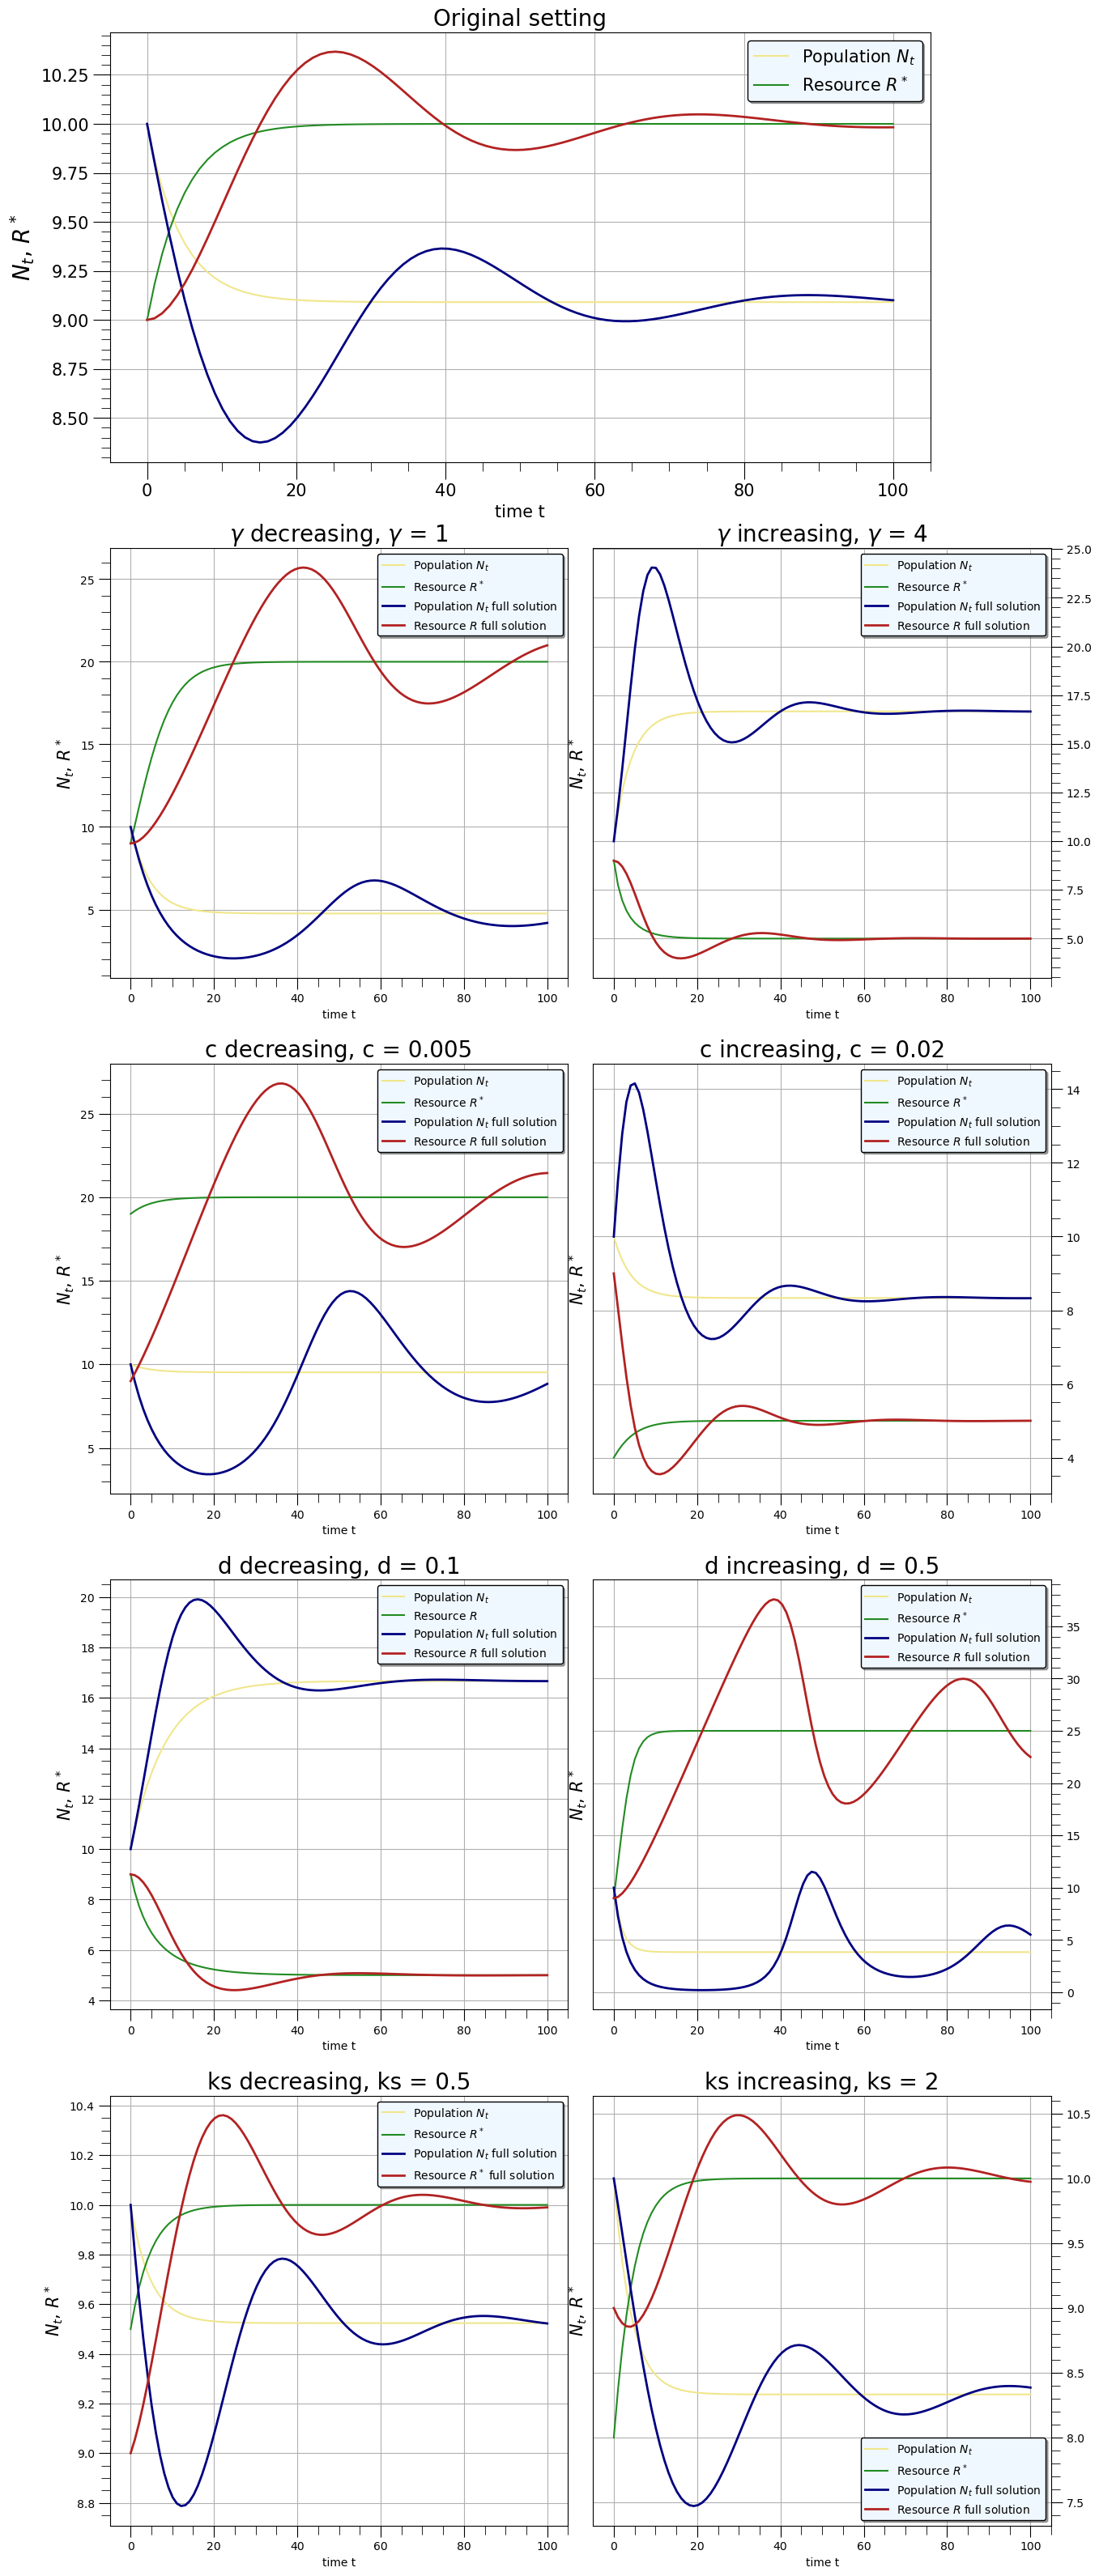

In [28]:
c = 1/100; d = 1/5; ks = 1; initial = 10; gamma = 2

gamma_1 = 1; gamma_2 = 4
c_1 = 1/200; c_2 = 2/100
d_1 = 1/10; d_2 = 1/2
ks_1 = 1/2; ks_2 = 2
fig = plt.figure(figsize=(15, 40))

grid = fig.add_gridspec(5, 16, wspace =0.7, hspace = 0.2)

# First figure: original parameters

f_ax1 = fig.add_subplot(grid[0, :14])
f_ax1.set_title('Original setting', fontsize = 20)

f_ax1.plot(t, population_t, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax1.plot(t, stationary_result, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')
f_ax1.legend(fontsize = 15, facecolor = 'aliceblue', shadow = True, edgecolor = 'black')
f_ax1.tick_params(axis='both', which='major', labelsize=15, length=15)
f_ax1.tick_params(axis='both', which='minor', labelsize=15, length=8)
f_ax1.set_xlabel('time t', fontsize = 15)
f_ax1.set_ylabel('$N_t$, $R^*$', fontsize = 20)
f_ax1.grid(zorder = 1)

f_ax1.plot(t, solution[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax1.plot(t, solution[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)
f_ax1.minorticks_on()

# Increasing case, gamma

# QSA solution
population_gamma_increasing = population(gamma_2, c, ks, d, initial, t)
stationary_result_gamma_increasing = stationary_resource(ks, c, d, initial, gamma_2, t)

# Full solution
solution_gamma_increasing = odeint(system, y0, t, args=(c, d, ks, gamma_2))


f_ax2 = fig.add_subplot(grid[1, 8:])
f_ax2.plot(t, population_gamma_increasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax2.plot(t, stationary_result_gamma_increasing, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')

f_ax2.plot(t, solution_gamma_increasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax2.plot(t, solution_gamma_increasing[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)

f_ax2.set_title(f'$\gamma$ increasing, $\gamma$ = {gamma_2}', fontsize = 20)




# Increasing case, c
f_ax3 = fig.add_subplot(grid[2, 8:])

# QSA solution
population_c_increasing = population(gamma, c_2, ks, d, initial, t)
stationary_c_increasing = stationary_resource(ks, c_2, d, initial, gamma, t)

# Full solution
solution_c_increasing = odeint(system, y0, t, args=(c_2, d, ks, gamma))

f_ax3.plot(t, population_c_increasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax3.plot(t, stationary_c_increasing, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')

f_ax3.plot(t, solution_c_increasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax3.plot(t, solution_c_increasing[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)

f_ax3.set_title(f'c increasing, c = {c_2}', fontsize = 20)



# Increasing case, d
f_ax4 = fig.add_subplot(grid[3, 8:])

# QSA solution
population_d_increasing = population(gamma, c, ks, d_2, initial, t)
stationary_d_increasing = stationary_resource(ks, c, d_2, initial, gamma, t)

# Full solution
solution_d_increasing = odeint(system, y0, t, args=(c, d_2, ks, gamma))

f_ax4.plot(t, population_d_increasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax4.plot(t, stationary_d_increasing, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')

f_ax4.plot(t, solution_d_increasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax4.plot(t, solution_d_increasing[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)

f_ax4.set_title(f'd increasing, d = {d_2}', fontsize = 20)


# Increasing case, ks
f_ax5 = fig.add_subplot(grid[4, 8:])

# QSA solution
population_ks_increasing = population(gamma, c, ks_2, d, initial, t)
stationary_ks_increasing = stationary_resource(ks_2, c, d, initial, gamma, t)

# Full solution
solution_ks_increasing = odeint(system, y0, t, args=(c, d, ks_2, gamma))

f_ax5.plot(t, population_ks_increasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax5.plot(t, stationary_ks_increasing, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')

f_ax5.plot(t, solution_ks_increasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax5.plot(t, solution_ks_increasing[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)

f_ax5.set_title(f'ks increasing, ks = {ks_2}', fontsize = 20)

# Decreasing case, gamma
f_ax6 = fig.add_subplot(grid[1, :8])

# QSA solution
population_gamma_decreasing = population(gamma_1, c, ks, d, initial, t)
stationary_result_gamma_decreasing = stationary_resource(ks, c, d, initial, gamma_1, t)

# Full solution
solution_gamma_decreasing = odeint(system, y0, t, args=(c, d, ks, gamma_1))

f_ax6.plot(t, population_gamma_decreasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax6.plot(t, stationary_result_gamma_decreasing, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')

f_ax6.plot(t, solution_gamma_decreasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax6.plot(t, solution_gamma_decreasing[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)

f_ax6.set_title(f'$\gamma$ decreasing, $\gamma$ = {gamma_1}', fontsize = 20)

# Decreasing case, c
f_ax7 = fig.add_subplot(grid[2, :8])

# QSA solution
population_c_decreasing = population(gamma, c_1, ks, d, initial, t)
stationary_c_decreasing = stationary_resource(ks, c_1, d, initial, gamma, t)

# Full solution
solution_c_decreasing = odeint(system, y0, t, args=(c_1, d, ks, gamma))

f_ax7.plot(t, population_c_decreasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax7.plot(t, stationary_c_decreasing, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')

f_ax7.plot(t, solution_c_decreasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax7.plot(t, solution_c_decreasing[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)

f_ax7.set_title(f'c decreasing, c = {c_1}', fontsize = 20)
# Decreasing case, d
f_ax8 = fig.add_subplot(grid[3, :8])

# QSA solution
population_d_decreasing = population(gamma, c, ks, d_1, initial, t)
stationary_d_decreasing = stationary_resource(ks, c, d_1, initial, gamma, t)

# Full solution
solution_d_decreasing = odeint(system, y0, t, args=(c, d_1, ks, gamma))

f_ax8.plot(t, population_d_decreasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax8.plot(t, stationary_d_decreasing, zorder = 2, label = "Resource $R$", color = 'forestgreen')

f_ax8.plot(t, solution_d_decreasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax8.plot(t, solution_d_decreasing[:,1], zorder = 2, label = "Resource $R$ full solution", color = 'firebrick', linewidth = 2)

f_ax8.set_title(f'd decreasing, d = {d_1}', fontsize = 20)
# Decreasing case, ks
f_ax9 = fig.add_subplot(grid[4, :8])

# QSA solution
population_ks_decreasing = population(gamma, c, ks_1, d, initial, t)
stationary_ks_decreasing = stationary_resource(ks_1, c, d, initial, gamma, t)

# Full solution
solution_ks_decreasing = odeint(system, y0, t, args=(c, d, ks_1, gamma))

f_ax9.plot(t, population_ks_decreasing, zorder = 2, label = "Population $N_t$", color = 'khaki')
f_ax9.plot(t, stationary_ks_decreasing, zorder = 2, label = "Resource $R^*$", color = 'forestgreen')

f_ax9.plot(t, solution_ks_decreasing[:,0], zorder = 2, label = "Population $N_t$ full solution", color = 'navy', linewidth = 2)
f_ax9.plot(t, solution_ks_decreasing[:,1], zorder = 2, label = "Resource $R^*$ full solution", color = 'firebrick', linewidth = 2)

f_ax9.set_title(f'ks decreasing, ks = {ks_1}', fontsize = 20)


all_figures = [f_ax2, f_ax3, f_ax4, f_ax5, f_ax6, f_ax7, f_ax8, f_ax9]
for ax in all_figures:
    ax.legend(fontsize = 10, facecolor = 'aliceblue', shadow = True, edgecolor = 'black', loc='best')
    ax.tick_params(axis='both', which='major', labelsize=10, length=10)
    ax.tick_params(axis='both', which='minor', labelsize=10, length=8)
    ax.set_xlabel('time t', fontsize = 10)
    ax.set_ylabel('$N_t$, $R^*$', fontsize = 15)
    ax.grid(zorder = 1)
    ax.minorticks_on()

for ax in [f_ax2, f_ax3, f_ax4, f_ax5]:
    ax.yaxis.tick_right()

<h2 style="font-size: 30px;">Results:</h2>

<p style="text-align: justify; font-size: 15px">
The first thing we notice, before we go into the details of every parameter, is that, although in each case the <b>QSA</b> solution resembles more and more the <b>full solution</b> as time increases, at the <mark style = "background-color: #e7e5e5;padding-left: 4px; padding-top: 1px; padding-bottom: 2px;
padding-right: 4px;"><i>t = 1000</i></mark> mark we have some combination of parameters where the <b>QSA</b> is far more distant from the <b>full solution</b> than in other cases.
</p>

<p style="text-align: justify; font-size: 15px">
We remark that changing only one parameter at a time limits the analysis which, to be more complete, should explore different combinations of our constants e.g. it would be interesting to study the product <span style="font-family: Times New Roman; font-size: 20px">&#947;</span>·<span style="font-family: Times New Roman; font-size: 20px">c</span> altoegether.
</p>

<p style="text-align: justify; font-size: 15px">
Now we go on a little run down of the results for each of the parameters tested.




- **$\gamma$**<br>
              1. **Increasing**: as we could expect, as the efficiency with which the resource up-taken is used for growth, leads to a higher asymptotical value of the <br>
                                population $N$. This also influences the Resource $R$ to stabilize at a lower value.<br>
        \
              2. **Decreasing**: we have the opposite behaviour and, looking at the full solution, a slower developing dynamics (in terms of the time needed to reach a <br>
                 stable phase)

- **$c$** <br>
              1. **Increasing**: interestingly, as the efficiency related to the consumption of the resource is higher, both the population and the resource reach a lower asymptotic value.<br>
        \
              2. **Decreasing**: we notice the opposite behaviour with an overall slower developement of the dynamic.
        
- **$d$** <br> 
         As far as the death rate, as expected, a lower death rate positively inpacts the $N_t$ and negatively $R^*$. In this case it is with the parameter increasing that the full solution<br>
         takes more time to become stable.<br>
         We can observe as, for `d = 0.5`, the population almost goes into extinction around `t = 20`.

- **$k_s$** <br> 
         We see that the act of doubling or cutting in half the saturation constant is what impacts the least our solution among all of the parameters consider. We have that with this<br>
         choice of the paramters, while the asymptotic value of $R^*$ does not change, $N_t$ respectively decreases and increases.                     



<h1 style="font-size: 30px">Stochastic Logistic Growth with Environmental noise</h1>



<p style="text-align: justify; font-size: 15px">
In the following we treat the case of Stochastic Logistic Growth with Environmental noise. We write down the Stochastic Differential Equation (<b>SDE</b>), then we write the associated <i style="font-style: oblique 15deg">Fokker-Planck</i> equation and we solve for <stem style="font-family:DejaVu Sans; font-size: 18px">P<sup>*</sup>(x)</stem> finding the stationary solution.
</p>



<p style = "font-size: 25px"><b>SDE</b>:</p>

$$
\begin{equation}\tag{7}
\dfrac{\mathcal{d}x_i}{\mathcal{d}t} \quad = \quad \dfrac{x_i}{\tau_i} \big( 1 - \dfrac{x_i}{K_i} \big) + \sqrt{\dfrac{\sigma_i}{\tau_i}}\cdot x_i \xi_i(t)
\end{equation}
$$

</br>

Recognizing the tipycal form $\quad \dot{x} = A(x) + \sqrt{B(x)} \cdot \xi{(t)} \quad$ we can write $A(x) = \dfrac{x}{\tau} \cdot \bigg(  1 - \dfrac{x}{k}  \bigg) \quad$ and $B(x) = \dfrac{\sigma}{\tau} x^2$
\
\
\
\
The associated *Fokker Planck* equation is then,


<br/>
<br/>

$$
\begin{equation}\tag{8}

\dfrac{\partial P(x)}{\partial t} \quad = \quad -\dfrac{\partial}{\partial x} \big[ A(x)P(x)   \big] + \dfrac{1}{2} \dfrac{\partial^2}{\partial x^2} \big[  B(x)P(x)  \big] \quad = \quad -\dfrac{\partial}{\partial x} \bigg[ \dfrac{x}{\tau} \big(   1 - \dfrac{x}{k}   \big)    P(x)   \bigg] + \dfrac{1}{2} \dfrac{\partial^2}{\partial x^2} \bigg[  \dfrac{\sigma}{\tau}x^2P(x)  \bigg]

\end{equation}
$$

<br/>

What we want to find is the stationary solution, obtianed by setting $\dfrac{\partial P(x)}{\partial t} = 0$. Therefore,

$$
\begin{equation}\tag{9}
0 \quad = \quad \dfrac{\partial}{\partial x}  \overbrace{\bigg(   \dfrac{x}{\tau} \cdot \bigg(  \dfrac{x}{k} - 1 \bigg)P(x) + \dfrac{1}{2} \dfrac{\partial}{\partial x}  \bigg(   \dfrac{\sigma}{\tau} x^2 P(x)  \bigg)}^{J(x)}
\end{equation}

$$

<br/>
<br/>

Knowing from above that $J(x)$ is a constant and setting in the initial condition we obtain,

<br/>

$$
%\begin{equation}\tag{10}
  \dfrac{x}{\tau} \cdot \bigg( 1 - \dfrac{x}{k}  \bigg)P(x) \quad = \quad \dfrac{1}{2} \dfrac{\sigma}{\tau} \bigg( 2xP(x) + x^2 \dfrac{\partial P}{ \partial x}  \bigg) \quad; \\[15pt]

  
  P(x) \bigg(  \dfrac{x}{\tau} \bigg( 1 -   \dfrac{x}{k}  \bigg) -  \dfrac{\sigma}{\tau} x \bigg) \quad = \quad \dfrac{1}{2} x^2 \cdot \dfrac{\sigma}{\tau} \dfrac{\partial P }{ \partial x}
%\end{equation}
\tag{10}
$$

<br/>
<br/>

Rearranging,

<br/>

$$
\begin{equation}\tag{11}
\dfrac{\mathcal{d} P}{P(x)} \quad = \quad \mathcal{d}x  \dfrac{2}{\sigma}\cdot  \big(  \dfrac{1 - \sigma}{x}  - \dfrac{1}{k} \big)
\end{equation}
$$

<br/>

And finally integrating,

$$
\begin{equation}\tag{12}
P(x) = 
\gamma \cdot exp \bigg\{  \dfrac{2}{\sigma} \cdot \bigg( \big(  1 - \sigma \big) \cdot ln x    -   \dfrac{x}{k}  \bigg)\bigg\}
\end{equation}
$$

<br/>

Where $\gamma$ is the integration constant, equal to,

<br/>

$$

\dfrac{1}{\gamma} = \int exp \bigg\{ \underbrace{   \dfrac{2}{\sigma} \cdot  \big(    1 - \sigma  \big)}_{\alpha}lnx  - \underbrace{\dfrac{1}{k}}_{\beta}  \cdot  x  \bigg\} \mathcal{d}x \quad =\\
$$

<br/>

$$

= \quad \int e^{ \alpha \cdot lnx } \cdot e^{ - \beta x }  \mathcal{d}x \quad =

$$

<br/>

$$

\quad = \int x^{\alpha} \cdot e^{- \beta x} \mathcal{d}x
\tag{13}

$$


<br/>

<p style="text-align: justify; font-size: 15px">

If $\alpha$ and $\beta$ would have been integers we could have solved the integral by partial integration and then, iterating long enough, we would get an integral of the form $\int e^{-\beta x} \mathcal{d}x$.

</p>


<p style="text-align: justify; font-size: 15px">

In the more general case of real coefficients $\big( \alpha, \beta \in \R  \big)$ we rely to the theorem of fundamental calculus,

</p>


$$


\dfrac{\mathcal{d}}{\mathcal{d} x}\bigg[    \int_{g(x)}^{\infty} h(t) \mathcal{d}t \bigg] \quad = \quad -h(g(x)) \cdot g'(x)
\tag{14}

$$

<br/>

<p style="text-align: justify; font-size: 15px">

Combined with the definition of the $\Gamma$ function,

<br/>

</p>


$$

\Gamma(a, x) = \int_x^{\infty}t^{a-1} \cdot e^{-t} \mathcal{d}t
\tag{15}
$$

<p style="text-align: justify; font-size: 15px">

Getting,

</p>

<br/>

$$

\dfrac{\mathcal{d}}{\mathcal{d}x} \Gamma(a + 1, bx) \quad = \quad \dfrac{\mathcal{d}}{\mathcal{d}x} \int_{bx}^{\infty}t^a \cdot e^{-t} \quad = \quad -\big(    bx   \big)^a e^{- bx} \cdot b \quad = \quad -b^{a + 1}x^a e^{-bx}

$$


<p style="text-align: justify; font-size: 15px">

In our specific case,

</p>

<br/>

$$

\int x^{\alpha} \cdot e^{- \beta x} \mathcal{d}x \quad \overbrace{=}^{\text{Where here we multiply and divide by } \beta^{\alpha + 1}} \quad \int \beta^{\alpha + 1}x^{\alpha}e^{-\beta x} \beta^{-\alpha - 1} \quad = \quad -\beta^{-\alpha-1} \int \bigg[   \dfrac{\mathcal{d}}{\mathcal{d}x} \Gamma \big(   \alpha + 1  , \beta x \big)  \bigg] \mathcal{d}x \quad = \quad - \beta^{-\alpha-1} \Gamma(\alpha + 1, \beta x)

$$



<h2 style="font-size: 25px;">Simulation of the SDA</h2>

Here below we simulate the SDE in the limit where $\sigma = 0$ so the stochastic part will not be taken into account.<br>
This case can be solved analytical and, as $t \rightarrow \infty$ $x$ saturates to $k$. The simulation, if done correctly should reflect that.

The simulation in the complete case will be probably presented in next week's homework.



In [29]:
def SDA(x, t, tau, k, sigma):
    

    # SDA with environmental noise

    dx_dt = (x/tau)*(1 - x/k) + np.sqrt(sigma/tau) * x * np.random.normal(0,1, 1)

    return dx_dt

In [30]:
# SDA parameters
tau = 2; k = 5; sigma = 0

# time_domain
t = np.linspace(0, 100, 100)

# initial conditions
x0 = 0.5

solution = odeint(SDA, x0, t, args=(tau, k, sigma))

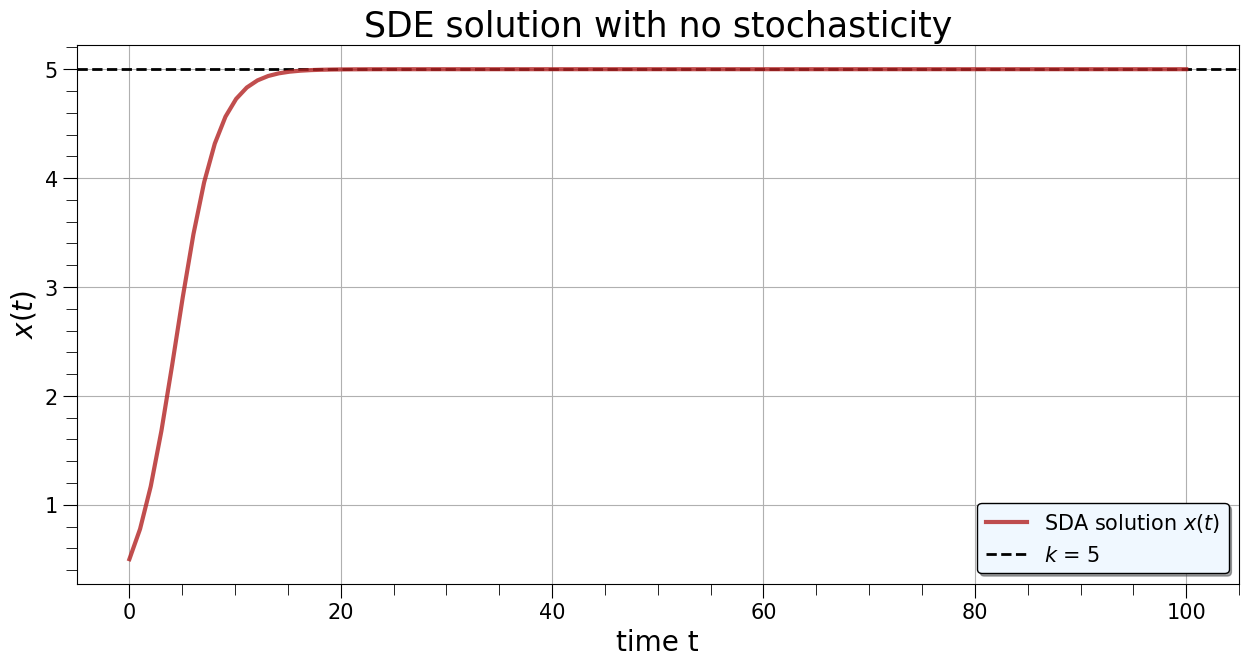

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.plot(t, solution, linewidth = 3, color = 'firebrick', label = 'SDA solution $x(t)$', zorder = 3, alpha = 0.8)
ax.minorticks_on()
ax.axhline(y = k, linestyle = '--', linewidth = 2, color = 'black', label = f'$k$ = {k}', zorder = 2)
ax.legend(facecolor = 'aliceblue', shadow = True, edgecolor = 'black', loc='best', fontsize = 15)
ax.set_xlabel('time t', fontsize = 20)
ax.set_ylabel('$x(t)$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15, length=10)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.set_title('SDE solution with no stochasticity', fontsize = 25)
ax.grid(zorder = 1)